## Predicting Efficiency From Weather

Since efficiency is a quantitative variable only regression models will be used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


In [2]:
data = pd.read_csv("MLdata.csv")
data

,index,Date/Time,Energy Produced (Wh),Year,Month,Day,Date,Dateobs,air_temp_set_1,pressure_set_1d,...,"pct_Rain,Fog",pct_Sky Obscured,pct_Smoke,"pct_Smoke,Blowing Dust",pct_Thunder,pct_Thunderstorm,"pct_Thunderstorm,Fog","pct_Thunderstorm,Hail",model,percent_of_projected
0,0,2013-10-15 00:00:00 -0700,29353,2013,10,15,2013-10-15,2013-10-15,24.841667,99542.463333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27071.233280,108.428751
1,1,2013-10-16 00:00:00 -0700,28786,2013,10,16,2013-10-16,2013-10-16,24.836364,99914.350909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26817.530653,107.340233
2,2,2013-10-17 00:00:00 -0700,29536,2013,10,17,2013-10-17,2013-10-17,21.409091,99766.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26566.087779,111.179336
3,3,2013-10-18 00:00:00 -0700,29296,2013,10,18,2013-10-18,2013-10-18,22.281818,99760.157273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26316.978842,111.319769
4,4,2013-10-19 00:00:00 -0700,29932,2013,10,19,2013-10-19,2013-10-19,14.714286,99865.542143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26070.277331,114.812741
5,5,2013-10-20 00:00:00 -0700,28312,2013,10,20,2013-10-20,2013-10-20,14.100000,99703.212778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25826.056019,109.625721
6,6,2013-10-21 00:00:00 -0700,28030,2013,10,21,2013-10-21,2013-10-21,14.650000,99704.004286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25584.386942,109.559006
7,7,2013-10-22 00:00:00 -0700,28547,2013,10,22,2013-10-22,2013-10-22,15.107143,99734.883571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25345.341374,112.632139
8,8,2013-10-23 00:00:00 -0700,16374,2013,10,23,2013-10-23,2013-10-23,15.186667,99622.286000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25108.989810,65.211704
9,9,2013-10-24 00:00:00 -0700,16510,2013,10,24,2013-10-24,2013-10-24,15.400000,99903.186154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24875.401943,66.370787


## KNearest Neighbors:

In [3]:
#find best neigbor number using RMSE as a metric for testing error
def knearest(data, X,Y, Title):
    #data= dataframe that contains both input and output vars
    #X is an array of input column names
    #y is name of output column you are trying to predict
    #Title = Title of the graph
    
    tests = {
        "Number of Neighbors" : [],
        "TestError":[],
    }
    for k in range(1, 100):
        model = KNeighborsRegressor(n_neighbors=k)
        test_error = np.sqrt(-cross_val_score(
                                 model,data[X], 
                                 data[Y],
                                 cv = 10, 
                                 scoring="neg_mean_squared_error"
                                ).mean())
        tests["Number of Neighbors"].append(k)
        tests["TestError"].append(test_error)
    df = pd.DataFrame(tests)
    ax = df.plot.scatter("Number of Neighbors","TestError")
    ax.set_xlabel("Number of Neighbors")
    ax.set_ylabel("RMSE")
    fig = plt.gcf()
    fig.set_size_inches(16,6)
    plt.title(Title)
    return df.sort_values("TestError").head(2)

Starting with all with using just quantitative variables:

In [4]:
data.columns

Index(['index', 'Date/Time', 'Energy Produced (Wh)', 'Year', 'Month', 'Day',
       'Date', 'Dateobs', 'air_temp_set_1', 'pressure_set_1d',
       'relative_humidity_set_1', 'wind_speed_set_1', 'day_length',
       'Weather_overall', 'pct_Blowing Dust', 'pct_Clear', 'pct_Fog',
       'pct_Haze', 'pct_Haze,Blowing Dust', 'pct_Heavy Rain',
       'pct_Heavy Rain,Fog', 'pct_Heavy Rain,Hail',
       'pct_Heavy Rain/Thunderstorm,Fog', 'pct_Light Rain',
       'pct_Light Rain,Fog', 'pct_Light Rain/Thunderstorm', 'pct_Mostly Clear',
       'pct_Mostly Cloudy', 'pct_Overcast', 'pct_Partly Cloudy', 'pct_Rain',
       'pct_Rain,Fog', 'pct_Sky Obscured', 'pct_Smoke',
       'pct_Smoke,Blowing Dust', 'pct_Thunder', 'pct_Thunderstorm',
       'pct_Thunderstorm,Fog', 'pct_Thunderstorm,Hail', 'model',
       'percent_of_projected'],
      dtype='object')

In [5]:
#Standardize the quantitative variables
quantitative = ["relative_humidity_set_1","air_temp_set_1","pressure_set_1d","wind_speed_set_1" ]
std_quantitative = []
for var in quantitative:
    name = "std_" + var
    std_quantitative.append(name)
    data[name] = (data[var]-data[var].mean())/data[var].std()

,Number of Neighbors,TestError
12,13,16.052929
7,8,16.064840


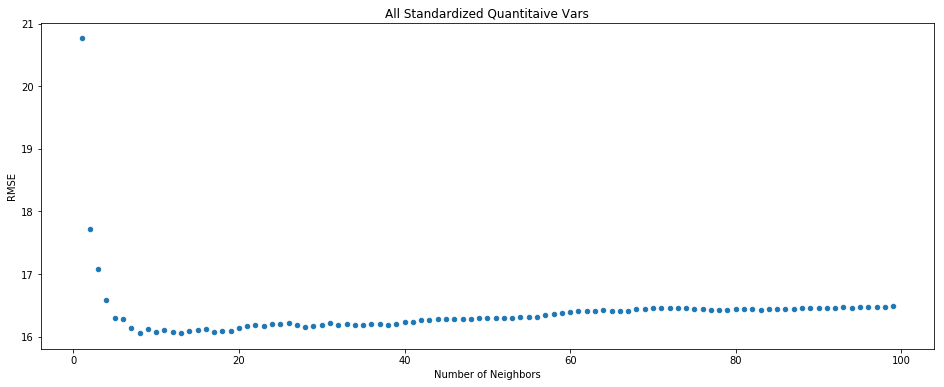

In [6]:
knearest(data, std_quantitative, "percent_of_projected", "All Standardized Quantitaive Vars")

std_relative_humidity_set_1 std_air_temp_set_1


,Number of Neighbors,TestError
24,25,15.685931
18,19,15.690030


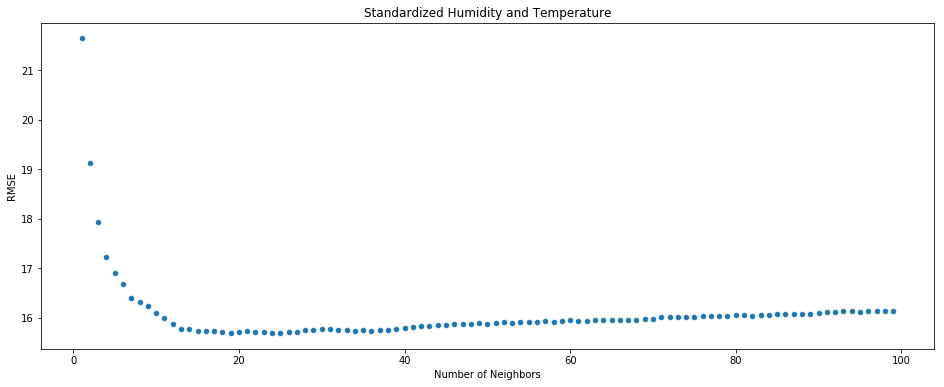

In [7]:
print(std_quantitative[0], std_quantitative[1])
knearest(data, [std_quantitative[0], std_quantitative[1]], "percent_of_projected", "Standardized Humidity and Temperature")

,Number of Neighbors,TestError
74,75,17.927225
75,76,17.927260


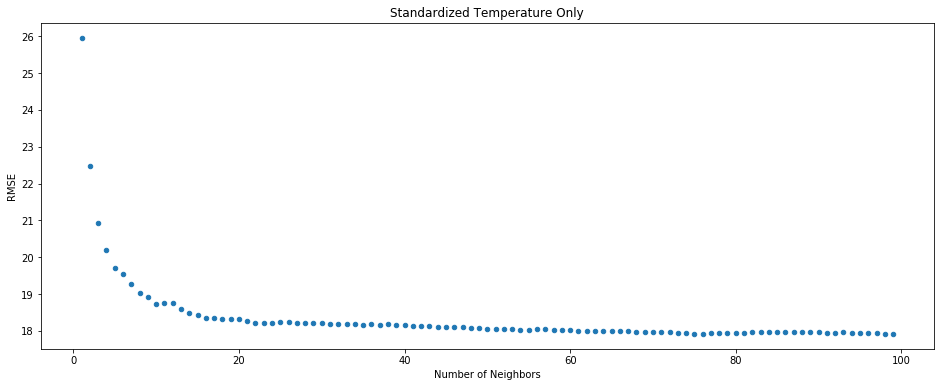

In [8]:
knearest(data, [std_quantitative[1]], "percent_of_projected", "Standardized Temperature Only")

std_relative_humidity_set_1


,Number of Neighbors,TestError
47,48,15.43687
48,49,15.43987


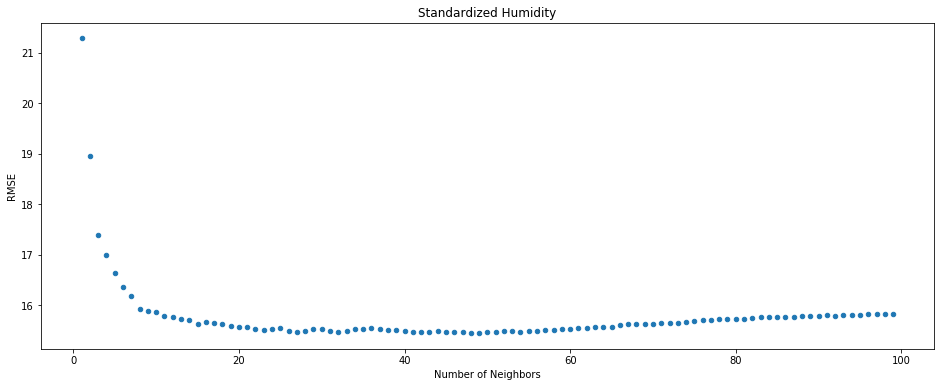

In [9]:
print(std_quantitative[0])
knearest(data, [std_quantitative[0]], "percent_of_projected", "Standardized Humidity")

### Observation
From the charts above, it seems that the most helpful quantitative variable is Humidity.

In [10]:
#use only humidity whenpairing with categorical vars
std_quantitative = [std_quantitative[0]]
#Get Dummy vars for categorical input
dummies = pd.get_dummies(data.Weather_overall)
dummies.head(1)

,Blowing Dust,Clear,Fog,Haze,"Heavy Rain,Fog",Light Rain,"Light Rain,Fog",Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,"Rain,Fog"
0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
dummies.drop("Clear", axis = 1, inplace = True)
data = data.merge(dummies, right_index=True,left_index=True)

X = std_quantitative
X.extend(dummies.columns.values)

,Number of Neighbors,TestError
11,12,12.498478
10,11,12.502569


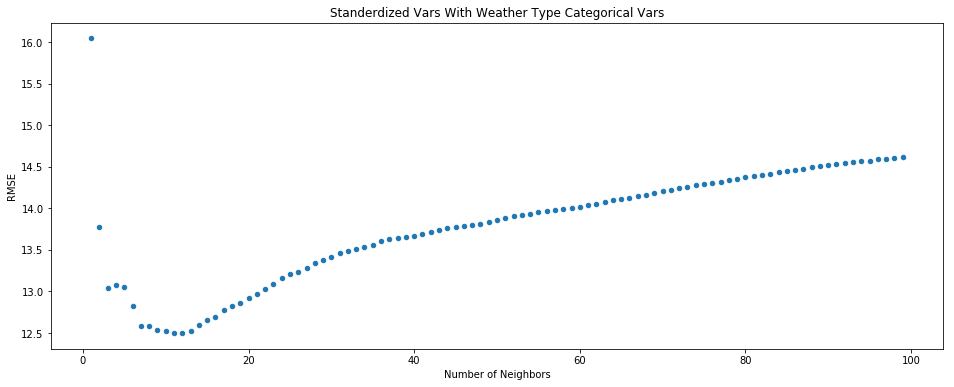

In [12]:
knearest(data, X, "percent_of_projected", "Standerdized Vars With Weather Type Categorical Vars")

In [13]:
#Try using the pct daily values in model 
#must remove nans from data
data.Weather_overall.fillna("none", inplace = True)
data2 = data.loc[data.Weather_overall != "none",:].copy()
len(data2)

1251

In [14]:
#now lets include the weathertypepercentages by day
weatherdailypcts = data2.columns.values[14:39]
data2.fillna(0.0, inplace = True)
dummy_col = dummies.columns.values
inputvars = ["std_relative_humidity_set_1"]
inputvars.extend(weatherdailypcts)
inputvars.extend(dummy_col)

,Number of Neighbors,TestError
7,8,10.103301
6,7,10.165106


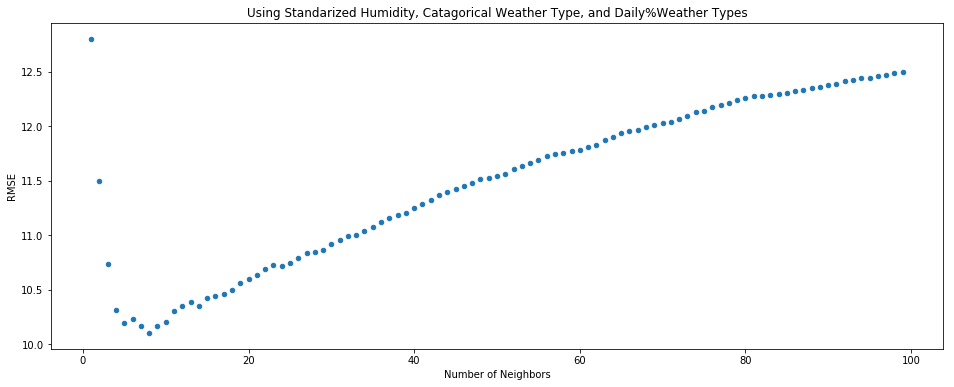

In [15]:
knearest(data2, inputvars, "percent_of_projected",
         "Using Standarized Humidity, Catagorical Weather Type, and Daily%Weather Types")

Cool! Including the weather type daily percentages did help! Now the RMSE is down to 10.1%.

,Number of Neighbors,TestError
15,16,10.547727
16,17,10.556913


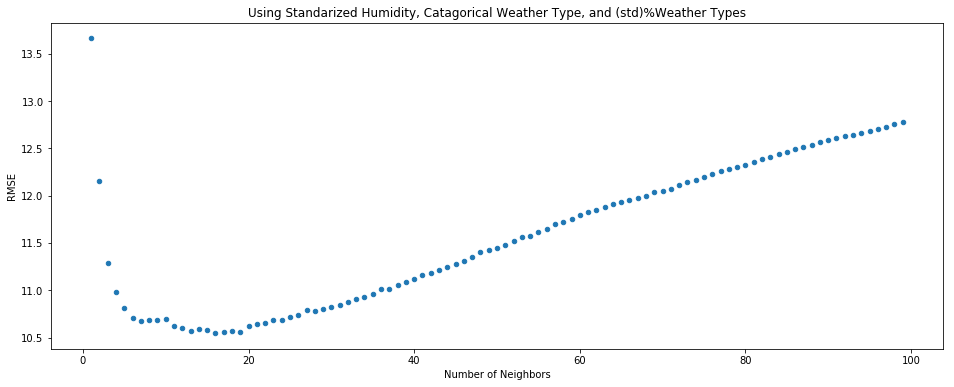

In [16]:
#Lets see if standardizing the weatherdailypcts helps:
data3 = data2.copy()
for var in weatherdailypcts:
    data3[var] = (data3[var]-data3[var].mean())/data3[var].std()
inputvarstd = ["std_relative_humidity_set_1"]
inputvarstd.extend(weatherdailypcts)
inputvarstd.extend(dummy_col)
knearest(data3, inputvarstd, "percent_of_projected", "Using Standarized Humidity, Catagorical Weather Type, and (std)%Weather Types")

## Linear Regression:

In [17]:
def linreg(data, X, Y):
    
    model = LinearRegression()
    cross_val_score(model, data[X], data[Y], )
    print("RMSE:")
    print(np.sqrt(-cross_val_score(
                    model,
                    data[X], 
                    data[Y],
                    cv = 10, 
                    scoring="neg_mean_squared_error"
                    ).mean()))


In [18]:
polyinput = []
for x in range(1, 11):
    print("Degree=%d"%x)
    if x == 1:
        polyinput.append("relative_humidity_set_1")
        linreg(data2, ["relative_humidity_set_1"], "percent_of_projected")
    else:
        name = "%drelative_humidity_set_1"%x
        polyinput.append(name)
        data2[name] = data2["relative_humidity_set_1"]**x
        linreg(data2, polyinput, "percent_of_projected")
        
        

Degree=1
RMSE:
17.0150639253
Degree=2
RMSE:
15.7620196964
Degree=3
RMSE:
15.4469732742
Degree=4
RMSE:
15.3864472243
Degree=5
RMSE:
15.4023878567
Degree=6
RMSE:
15.4259715523
Degree=7
RMSE:
15.4470024911
Degree=8
RMSE:
15.4714436203
Degree=9
RMSE:
15.4817931875
Degree=10
RMSE:
15.4639925757


Looks like 4th degree ploynomial for humidity works best. Now lets add weather types to the model.

In [19]:
linreg_input = []
linreg_input = polyinput[:4]
linreg_input.extend(weatherdailypcts)
linreg_input.extend(dummy_col)
linreg(data2, linreg_input, "percent_of_projected")

RMSE:
11.3849511538


## Random Forest Regression

In [20]:
def rfr(data, X,Y, Title):
    #data= dataframe that contains both input and output vars
    #X is an array of input column names
    #y is name of output column you are trying to predict
    #Title = Title of the graph
    
    tests = {
        "Number of Estimators" : [],
        "TestError":[],
    }
    for k in range(1, 75):
        model = RandomForestRegressor(n_estimators=k)
        test_error = np.sqrt(-cross_val_score(
                                 model,data[X], 
                                 data[Y],
                                 cv = 10, 
                                 scoring="neg_mean_squared_error"
                                ).mean())
        tests["Number of Estimators"].append(k)
        tests["TestError"].append(test_error)
        #print('.')
    df = pd.DataFrame(tests)
    ax = df.plot.scatter("Number of Estimators","TestError")
    ax.set_xlabel("Number of Estimators")
    ax.set_ylabel("RMSE")
    fig = plt.gcf()
    fig.set_size_inches(16,6)
    plt.title(Title)
    return df.sort_values("TestError").head(5)



,Number of Estimators,TestError
37,38,9.940354
52,53,9.963864
72,73,9.968703
63,64,9.973073
62,63,9.982700


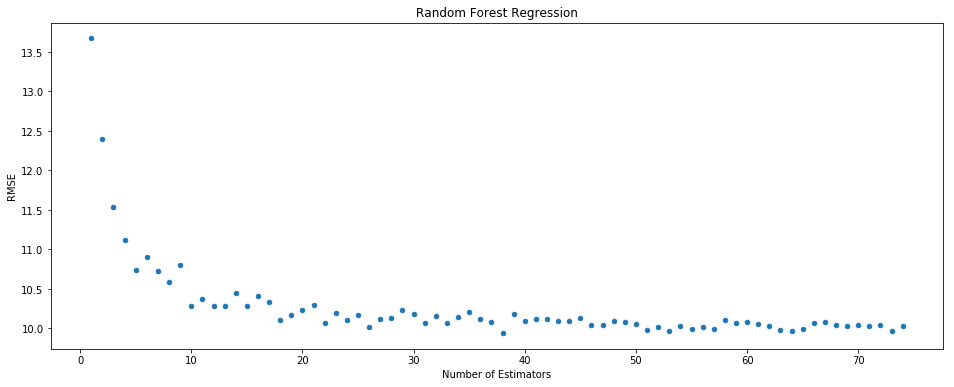

In [21]:
rfr(data2, inputvars,"percent_of_projected", "Random Forest Regression")

# Results:

### Knearest Neighbor Results:

- The best RMSE was 10.1 and occoured using 8 nearest neighbors.
- Input vars : Humidity(standarized), daily% weather types, and categoical weather types

### Linear Regression Results:

- The best RMSE was 11.38 
- Input vars: Humidity to the fourth degree, daily% weather types, and categoical weather types

### Random Forrest Regression:

- Had the best RMSE of 9.94-10.01 (varies with iteration)
- Input vars: Humidity to the fourth degree, daily% weather types, and categoical weather types

